In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import pickle

In [4]:
df = pd.read_csv(r"C:\Users\Ashwini\Downloads\Housing 1.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:

df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
df.shape

(545, 13)

In [7]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [31]:
df.duplicated().sum()

0

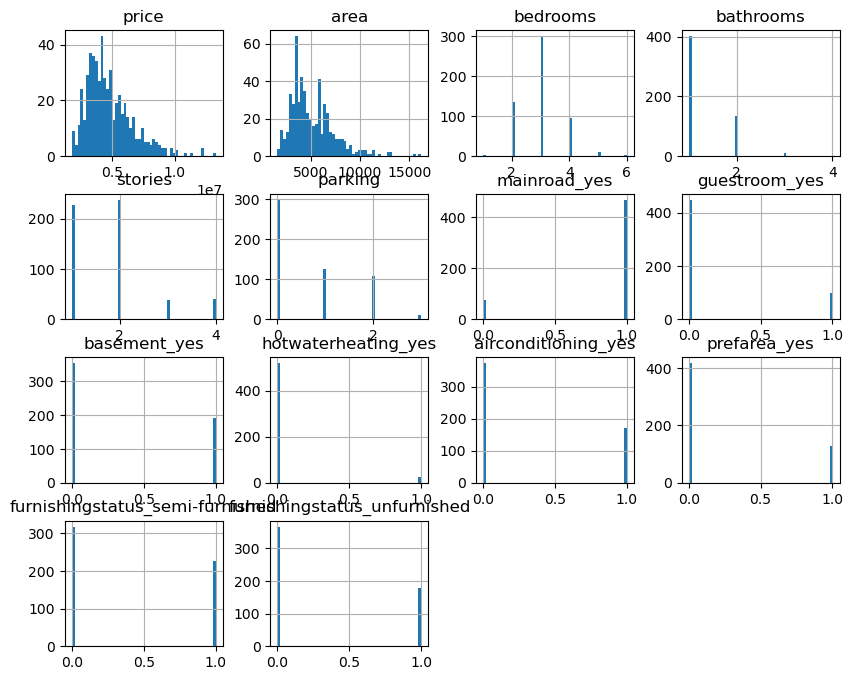

In [32]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10, 8))
plt.show()

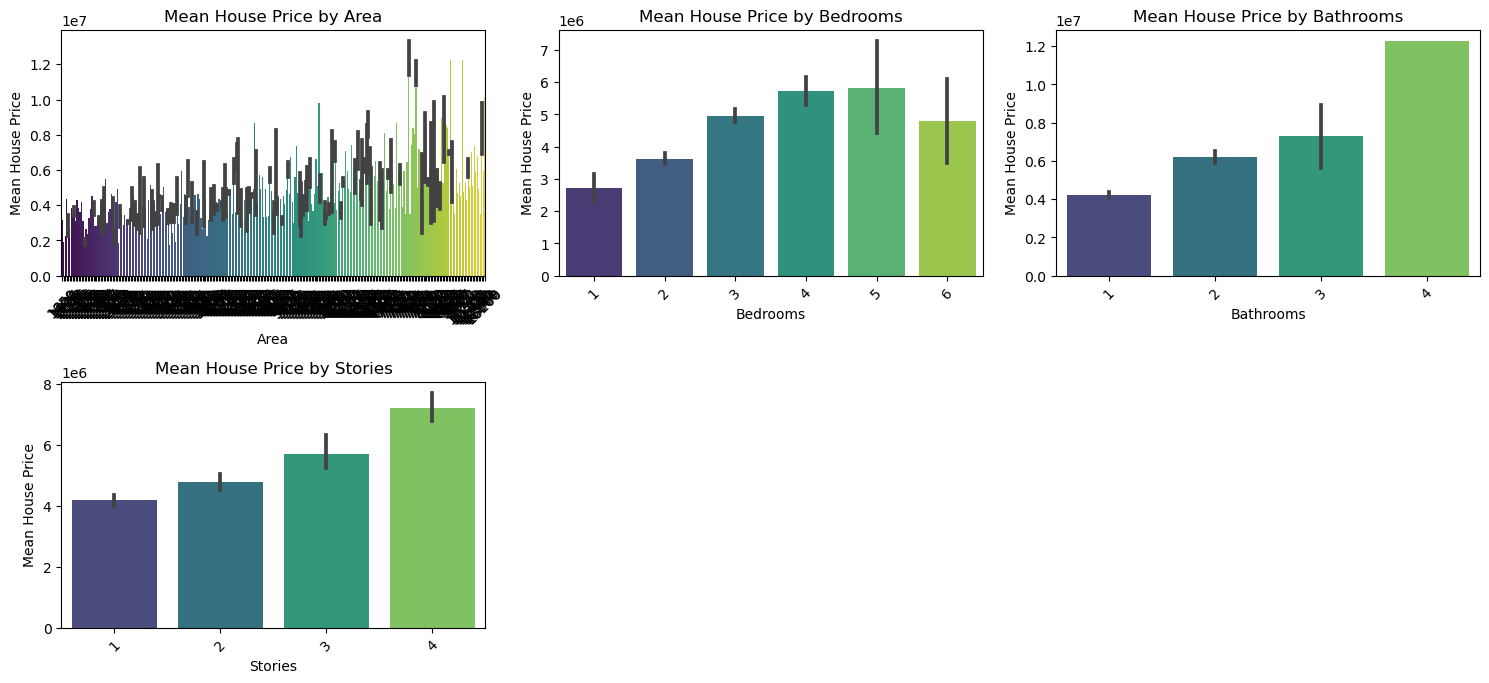

In [46]:
# Create bar plots for each categorical variable
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories']

plt.figure(figsize=(15, 10))
for i, cat_var in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=cat_var, y='price', data=df, palette='viridis')
    plt.title(f'Mean House Price by {cat_var.capitalize()}')
    plt.xlabel(cat_var.capitalize())
    plt.ylabel('Mean House Price')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


<AxesSubplot:xlabel='price', ylabel='Count'>

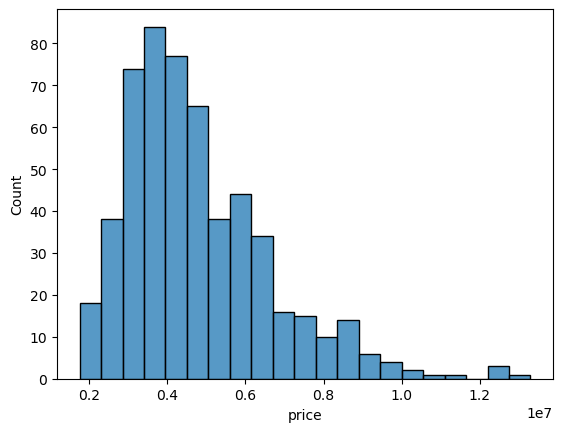

In [36]:
import seaborn as sns
print(df.price.describe())
sns.histplot(df.price)

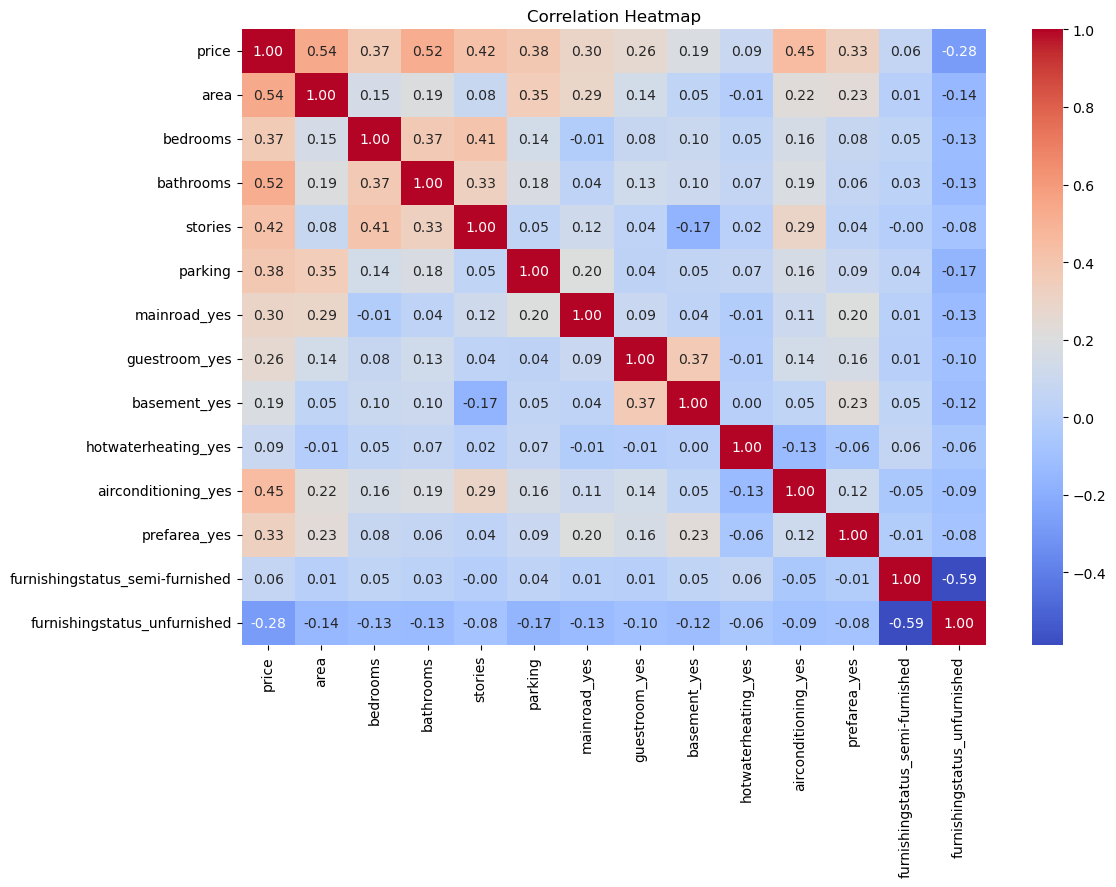

In [38]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


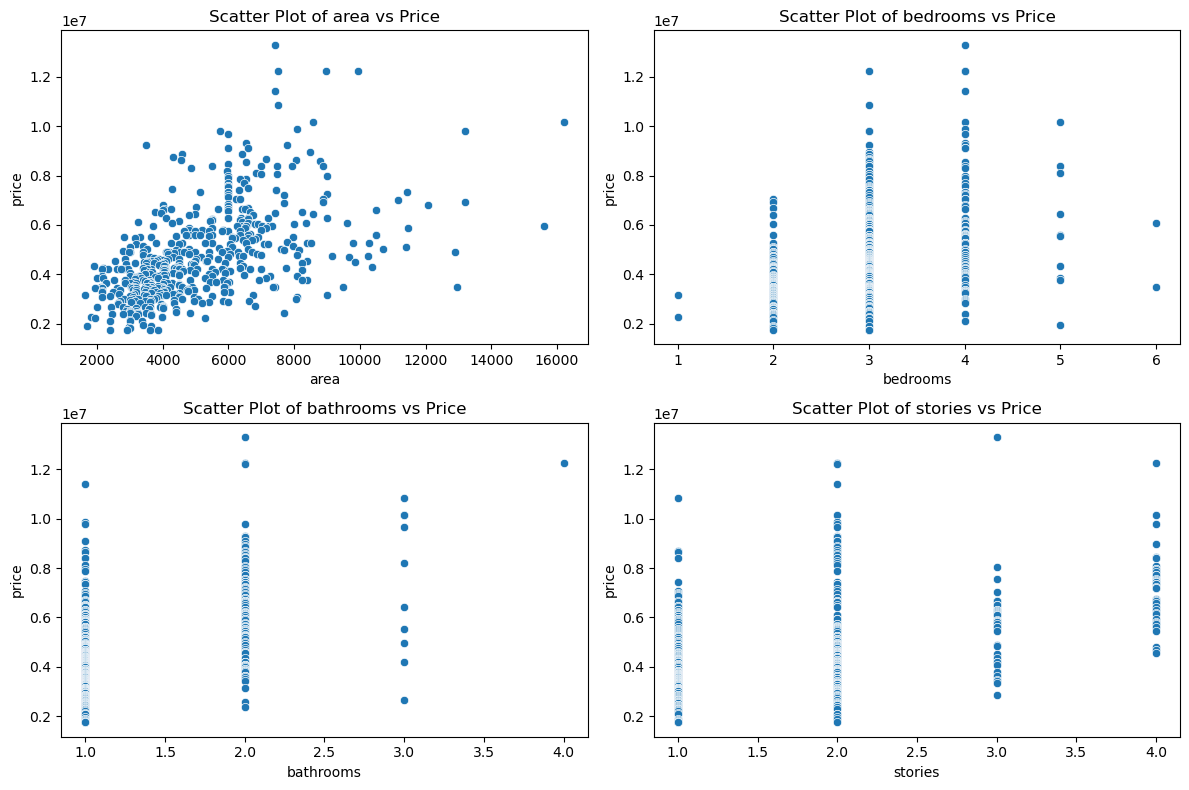

In [40]:
# Define numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories']

# Create scatter plots for each numerical feature against house price
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'Scatter Plot of {feature} vs Price')
plt.tight_layout()
plt.show()

In [12]:
# Apply one-hot encoding to categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [13]:
# Split the dataset into features X and target variable y
X = df.drop('price', axis=1)
y = df['price']

In [15]:
# Split the  data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
#create a Linear Regression Model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
y_pred= lm.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Linear Regression: ")
print("mean square error: ",mse)
print("Root mean square error: ",rmse)
print("Mean Absolute Error: ",mae)
print("R_squared score: ",r2)

Linear Regression: 
mean square error:  1754318687330.6685
Root mean square error:  1324506.9600914405
Mean Absolute Error:  970043.4039201642
R_squared score:  0.6529242642153175


In [20]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred_ridge)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_ridge)
r2=r2_score(y_test,y_pred_ridge)
print("Ridge Regression: ")
print("mean square error: ",mse)
print("Root mean square error: ",rmse)
print("Mean Absolute Error: ",mae)
print("R_squared score: ",r2)

Ridge Regression: 
mean square error:  1754839327446.8074
Root mean square error:  1324703.4866138187
Mean Absolute Error:  969857.9028478259
R_squared score:  0.6528212603810125


In [21]:
#Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred_dt)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_dt)
r2=r2_score(y_test,y_pred_dt)
print("Decision Tree Regression: ")
print("mean square error: ",mse)
print("Root mean square error: ",rmse)
print("Mean Absolute Error: ",mae)
print("R_squared score: ",r2)

Decision Tree Regression: 
mean square error:  3013886830275.2295
Root mean square error:  1736054.96176683
Mean Absolute Error:  1268669.7247706421
R_squared score:  0.40373035028134985


In [22]:
#Lasso Regression
la = Lasso()
la.fit(X_train_scaled, y_train)
y_pred_la = la.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred_la)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_la)
r2=r2_score(y_test,y_pred_la)
print("Lasso Regression: ")
print("mean square error: ",mse)
print("Root mean square error: ",rmse)
print("Mean Absolute Error: ",mae)
print("R_squared score: ",r2)

Lasso Regression: 
mean square error:  1754319994370.2712
Root mean square error:  1324507.4534974392
Mean Absolute Error:  970043.4056972673
R_squared score:  0.6529240056296141


In [23]:
#random forest regression
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred_rf)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_rf)
r2=r2_score(y_test,y_pred_rf)
print("Random forest regression: ")
print("mean square error: ",mse)
print("Root mean square error: ",rmse)
print("Mean Absolute Error: ",mae)
print("R_squared score: ",r2)

Random forest regression: 
mean square error:  1986807780188.267
Root mean square error:  1409541.6915395823
Mean Absolute Error:  1020750.1275229357
R_squared score:  0.6069284462671871


In [24]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [40, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create the Random Forest Regressor
rf = RandomForestRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate the performance of the best model
best_mse = mean_squared_error(y_test, y_pred_best_rf)
best_rmse = np.sqrt(best_mse)
best_mae = mean_absolute_error(y_test, y_pred_best_rf)
best_r2 = r2_score(y_test, y_pred_best_rf)

print("Best Random Forest Regression:")
print("Mean Squared Error: ", best_mse)
print("Root Mean Squared Error: ", best_rmse)
print("Mean Absolute Error: ", best_mae)
print("R-squared Score: ", best_r2)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 40}
Best Random Forest Regression:
Mean Squared Error:  2060739254855.7783
Root Mean Squared Error:  1435527.517972323
Mean Absolute Error:  1073826.000156514
R-squared Score:  0.5923017874091455


In [25]:
# Use the best parameters from the grid search
best_params = grid_search.best_params_

# Create a new Random Forest Regressor with the best hyperparameters
new_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

# Fit the new model to the data
new_rf_model.fit(X_train_scaled, y_train)

# Make predictions using the new model
y_pred_new_rf = new_rf_model.predict(X_test_scaled)

# Evaluate the performance of the new model
new_mse = mean_squared_error(y_test, y_pred_new_rf)
new_rmse = np.sqrt(new_mse)
new_mae = mean_absolute_error(y_test, y_pred_new_rf)
new_r2 = r2_score(y_test, y_pred_new_rf)

print("New Random Forest Regression with Best Hyperparameters:")
print("Mean Squared Error: ", new_mse)
print("Root Mean Squared Error: ", new_rmse)
print("Mean Absolute Error: ", new_mae)
print("R-squared Score: ", new_r2)

New Random Forest Regression with Best Hyperparameters:
Mean Squared Error:  2081785760873.844
Root Mean Squared Error:  1442839.4785539533
Mean Absolute Error:  1083542.4054010909
R-squared Score:  0.5881379307423551


In [49]:
ip=2000,1,1,2,0,0,0,0,0,0,0,0,0
ip=np.array(ip).reshape(1,-1)

In [51]:
prediction =new_rf_model.predict(ip)
prediction

array([7166298.89520202])

In [53]:
filename = 'finalized_model.sav'
pickle.dump(new_rf_model,open(filename,'wb'))


In [54]:
#Load the model from disk 
model = pickle.load(open('finalized_model.sav','rb'))

In [55]:
pred=model.predict(ip)
pred

array([7166298.89520202])

In [56]:
pip show scikit_learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\ashwini\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, scikit-learn-intelex
